In [135]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from torchvision import transforms, datasets
import main
import PIL
%matplotlib inline



In [136]:
def predict_image(model, image):

    with torch.no_grad():
        output = model(image)
    return output

In [137]:
def preprocess_image(image_path):

    transform = transforms.Compose([
        transforms.Resize((28, 28)),
         transforms.Grayscale(),
        transforms.Lambda(lambda x: PIL.ImageOps.invert(x)),
        transforms.ToTensor(),
        # transforms.Normalize((0.5,), (0.5,))
    ])
    image = Image.open(image_path).convert("L")
    image = transform(image)

    return image.unsqueeze(0)




In [138]:
def visualize_embeddings(embeddings, labels, test_embedding):
    cmap = plt.get_cmap("tab10")
    
    # Get unique labels and their corresponding colors
    unique_labels = sorted(set(labels))
    unique_colors = [cmap(label) for label in unique_labels]

    # Plot the embeddings
    fig, ax = plt.subplots()
    scatter = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap=cmap)
    ax.scatter(test_embedding[0][0], test_embedding[0][1], marker='^', c='black', s=100)

    # Create legend handles with digit labels and colors
    legend_handles = []
    for label, color in zip(unique_labels, unique_colors):
        legend_handles.append(Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor=color, markersize=8, label=str(label)))
    legend_handles.append(Line2D([0], [0], marker='^', color='w', label='Test Digit',
                                 markerfacecolor='black', markersize=8))

    # Add legend with handles
    ax.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()



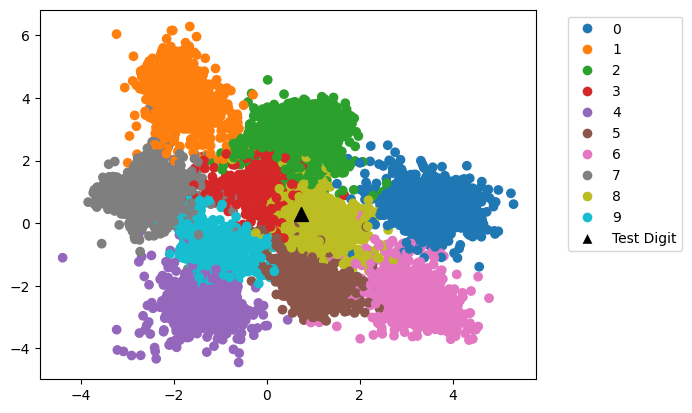

In [139]:
embedding_dims = 2

# Load the trained model and its state dictionary
model = main.Network(embedding_dims)
checkpoint = torch.load("trained_model.pth")
model.load_state_dict(checkpoint["model_state_dict"])

# Load the trained embeddings
trained_embeddings = np.load("trained_embeddings.npy")
trained_labels = np.load("trained_labels.npy")



image_path = 'uploaded_image.png'
image = preprocess_image(image_path)
test_embedding = predict_image(model, image)

visualize_embeddings(trained_embeddings, trained_labels, test_embedding)
